In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [46]:
company_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'JPM', 'GS', 'WMT', 'KO']
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

In [56]:
company_data = {}

# Download historical data for each company
for symbol in company_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    company_data[symbol]=df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [57]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-12,62.430000,62.810001,62.270000,62.500000,60.679550,13026900
2022-09-13,62.200001,62.220001,60.279999,60.470001,58.708683,18532800
2022-09-14,60.639999,61.080002,60.439999,60.790001,59.019360,12881600
2022-09-15,60.400002,60.400002,59.360001,59.529999,58.217442,11451900
2022-09-16,59.660000,59.799999,59.110001,59.540001,58.227222,20493500
...,...,...,...,...,...,...
2023-09-01,60.000000,60.130001,59.119999,59.310001,59.310001,11257200
2023-09-05,59.250000,59.320000,58.669998,58.820000,58.820000,12474600
2023-09-06,58.619999,58.830002,58.419998,58.779999,58.779999,13923500


In [58]:
company_models={}
for symbol, df in company_data.items():
    df = df.copy()  # Create a copy to avoid modifying the original DataFrame
    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)
    X = df[['Close']]
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    company_models[symbol] = model

In [59]:
from sklearn.metrics import mean_squared_error

for symbol, model in company_models.items():
    X_test = df[['Close']].iloc[-1].values.reshape(1, -1)  # Latest closing price as test data
    y_test = df['Target'].iloc[-1]  # Actual target value for the latest date
    y_pred = model.predict(X_test)  # Predict the target value

    mse = mean_squared_error([y_test], [y_pred])
    rmse = np.sqrt(mse)

    print(f"Company: {symbol}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")


Company: AAPL
Mean Squared Error (MSE): 0.17156771767434187
Root Mean Squared Error (RMSE): 0.4142073365771566
Company: MSFT
Mean Squared Error (MSE): 0.06462803531776042
Root Mean Squared Error (RMSE): 0.25422044630155227
Company: GOOGL
Mean Squared Error (MSE): 0.010353288167092856
Root Mean Squared Error (RMSE): 0.10175110892316042
Company: AMZN
Mean Squared Error (MSE): 0.21352374738639188
Root Mean Squared Error (RMSE): 0.46208629863521367
Company: TSLA
Mean Squared Error (MSE): 7.097681745269975
Root Mean Squared Error (RMSE): 2.664147470631079
Company: NVDA
Mean Squared Error (MSE): 0.12823652446184533
Root Mean Squared Error (RMSE): 0.358101276822417
Company: JPM
Mean Squared Error (MSE): 3.385534644897682
Root Mean Squared Error (RMSE): 1.839982240375619
Company: GS
Mean Squared Error (MSE): 91.35809640383964
Root Mean Squared Error (RMSE): 9.558142936985178
Company: WMT
Mean Squared Error (MSE): 0.3575425834972593
Root Mean Squared Error (RMSE): 0.5979486462040526
Company: KO

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

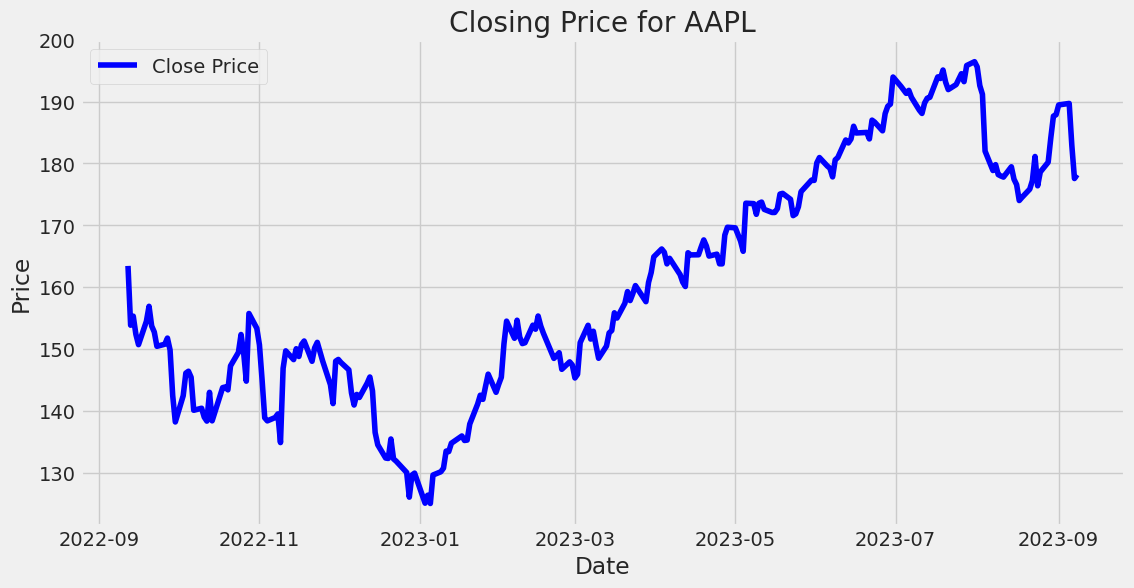

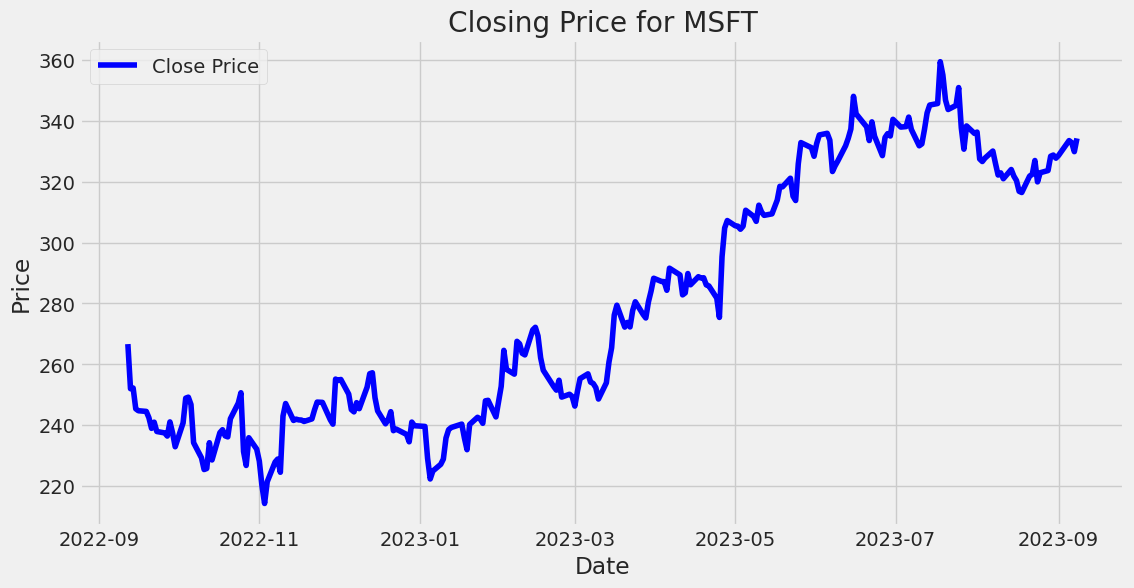

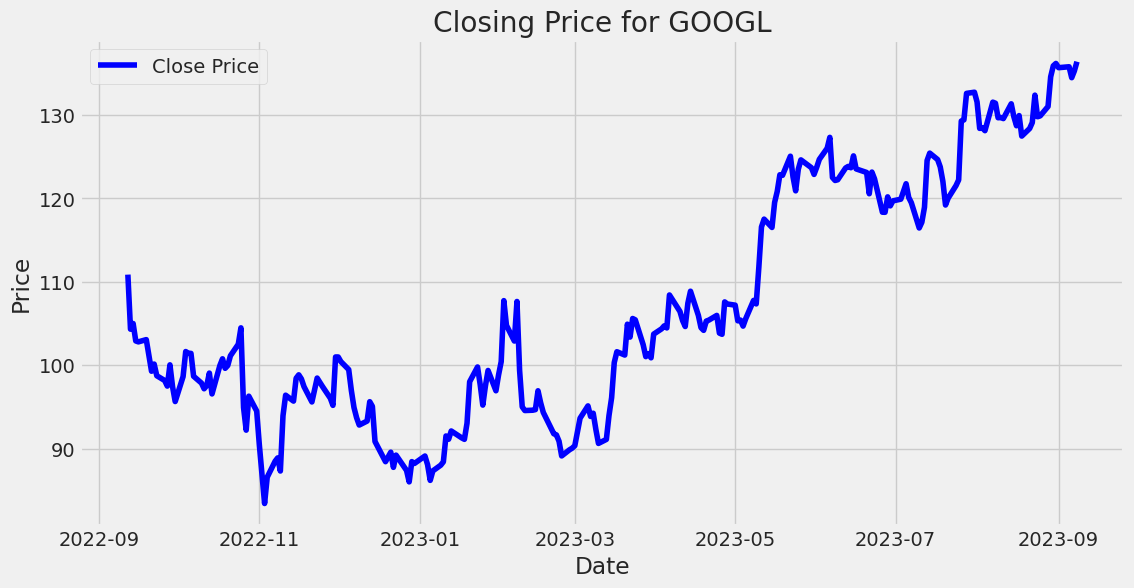

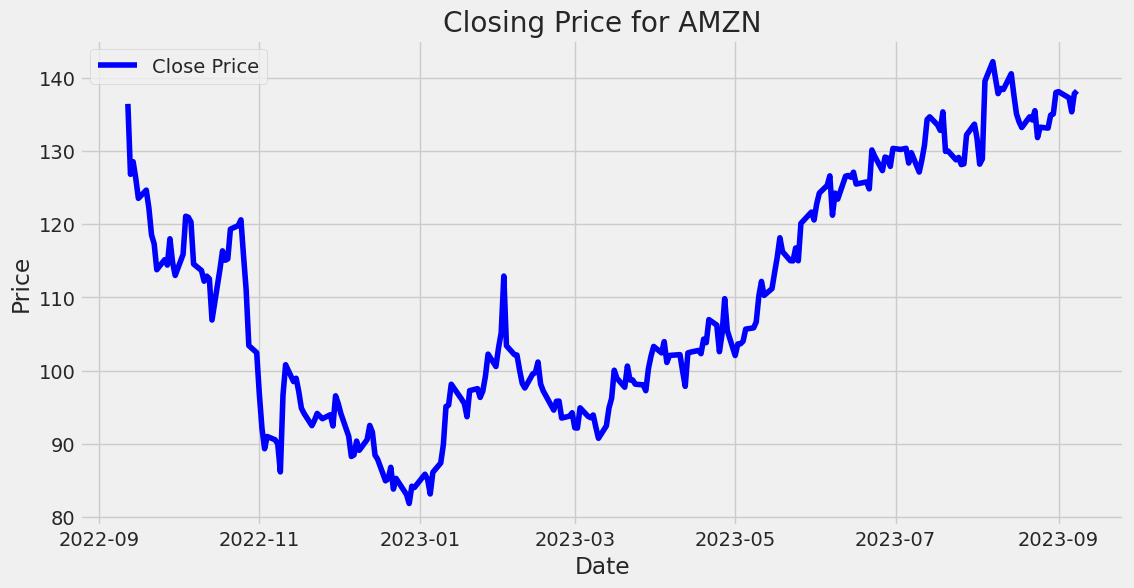

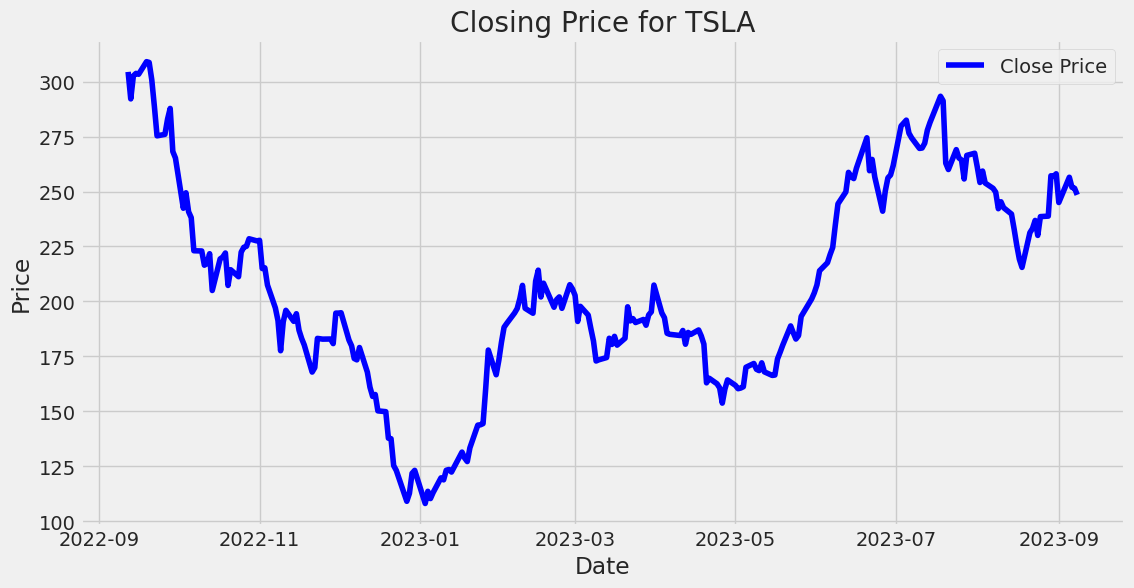

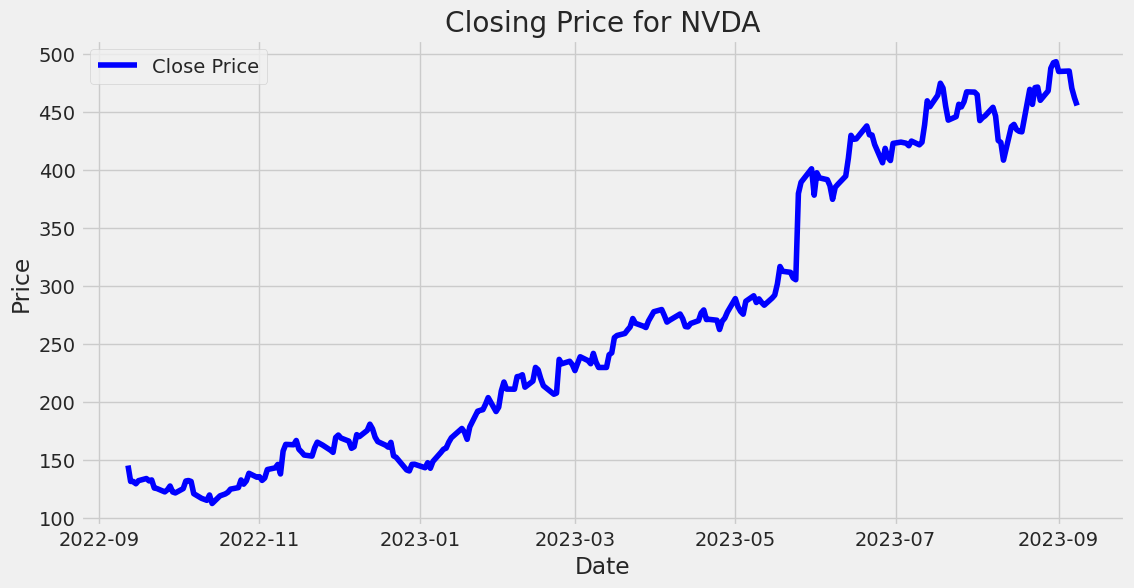

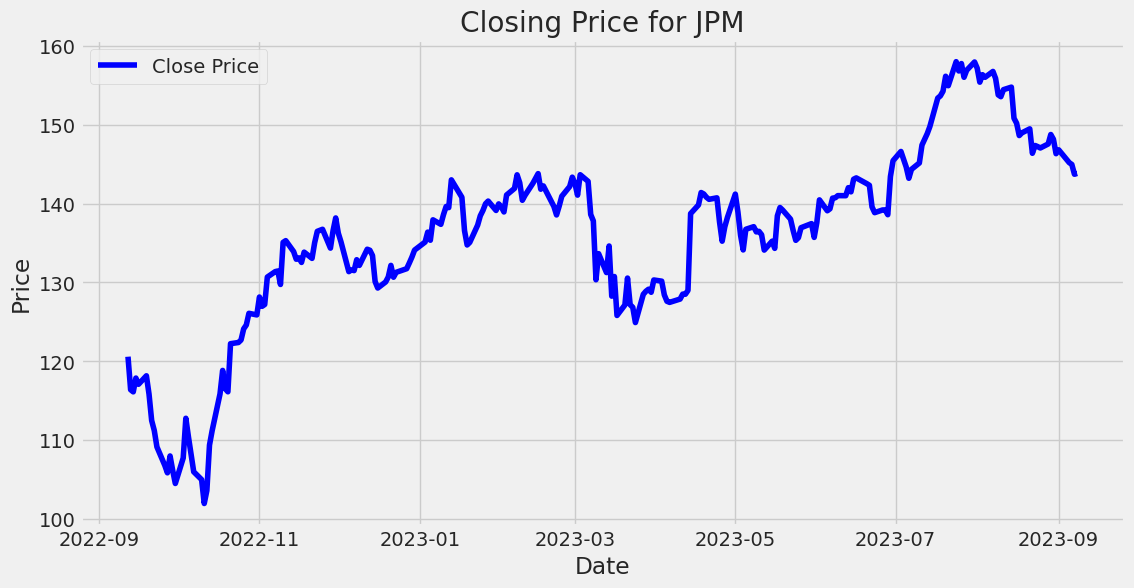

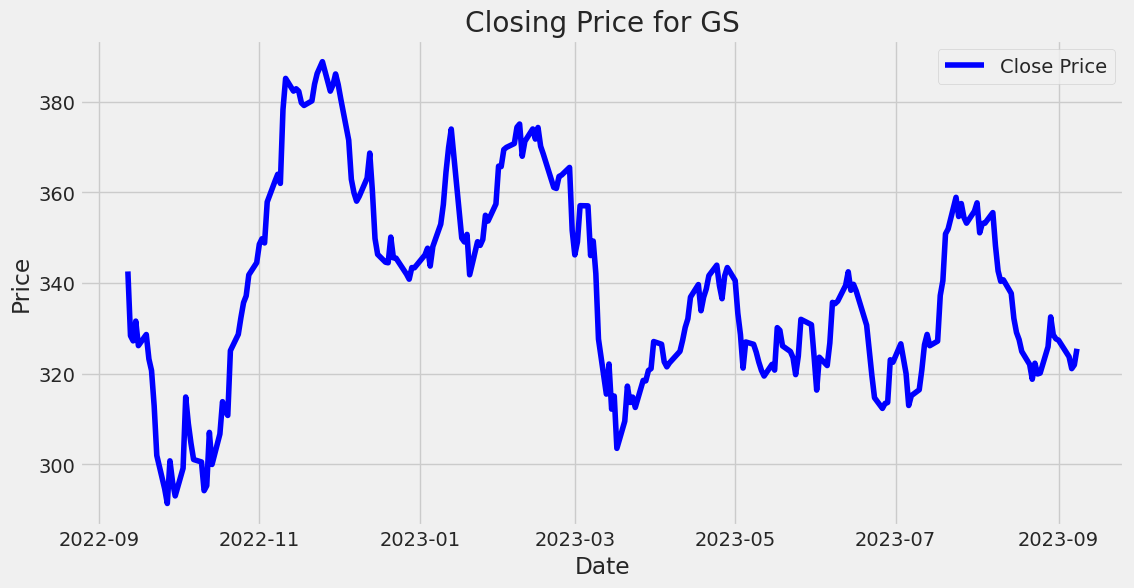

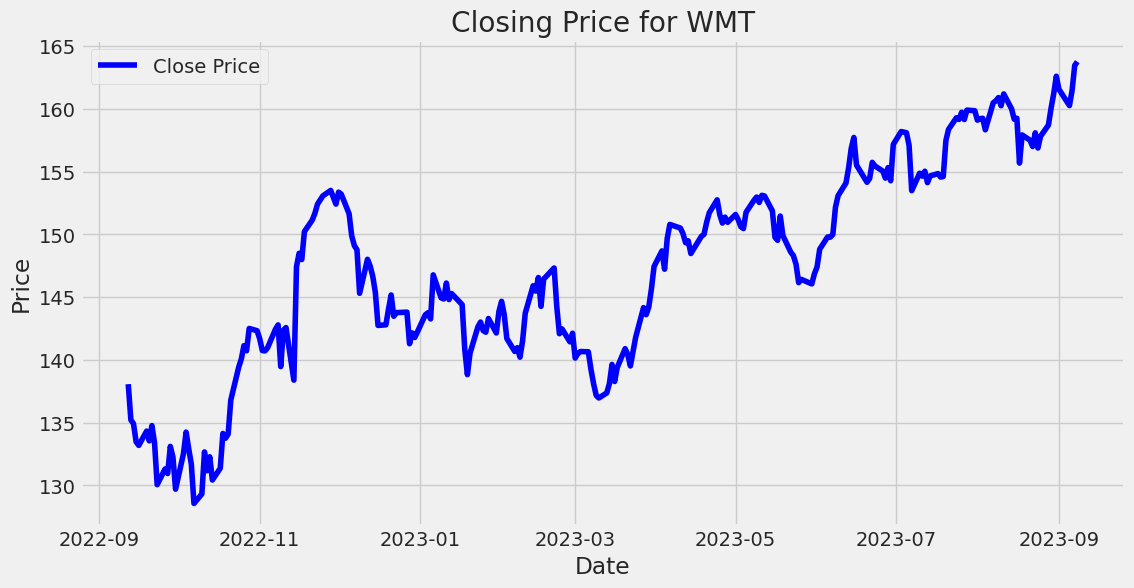

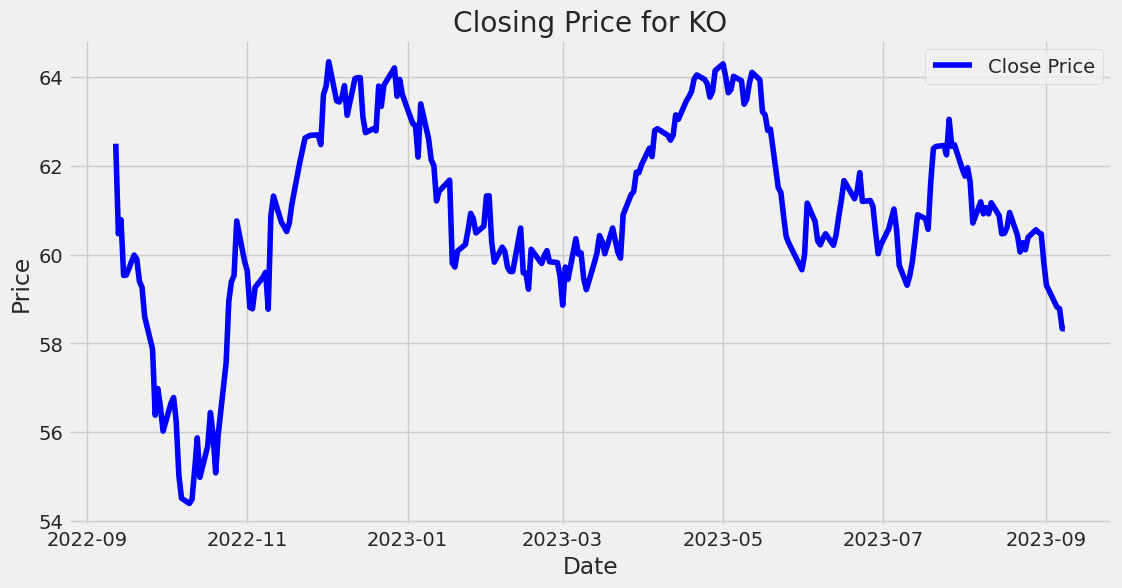

In [60]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Closing Price for {symbol}')
    plt.grid(True)
    plt.show()

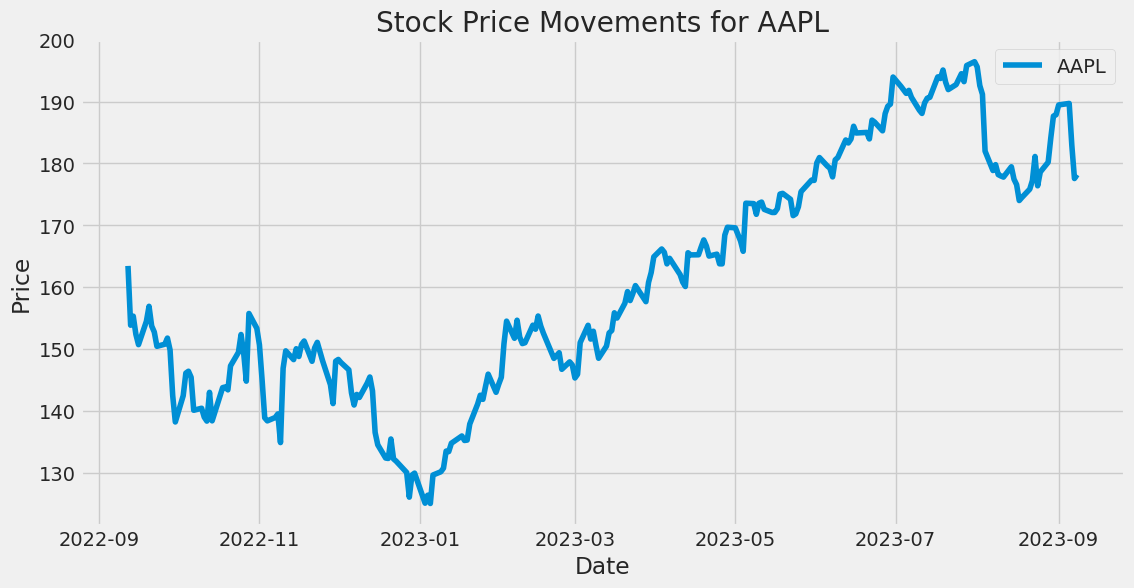

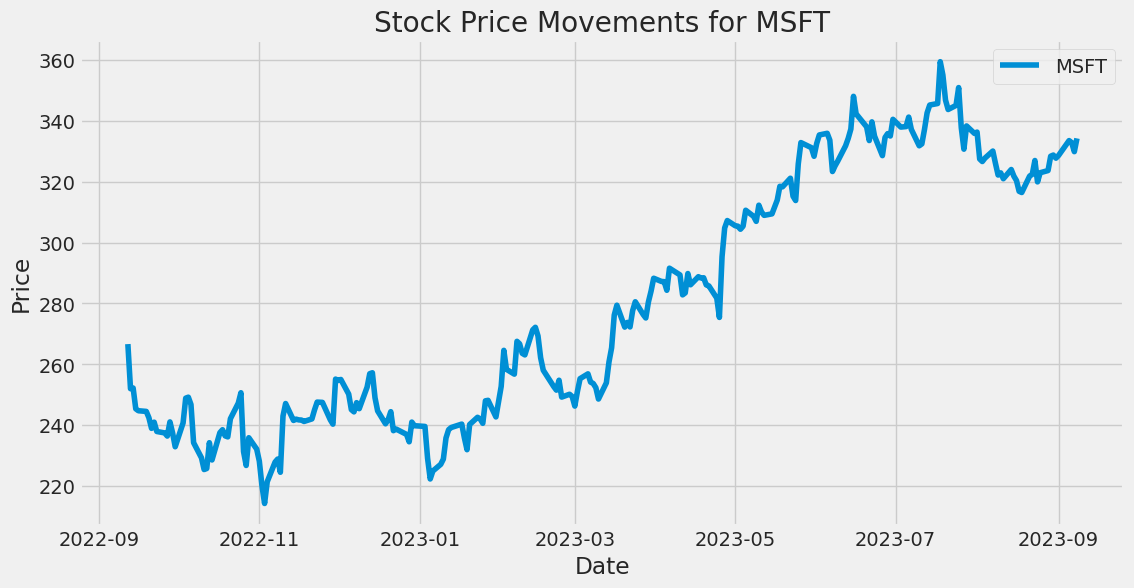

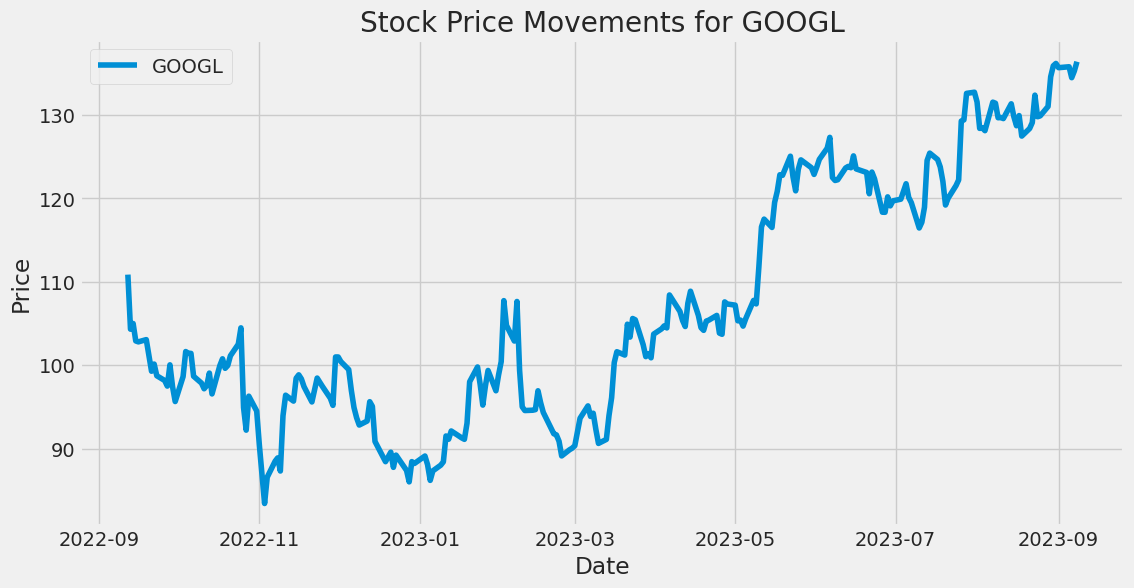

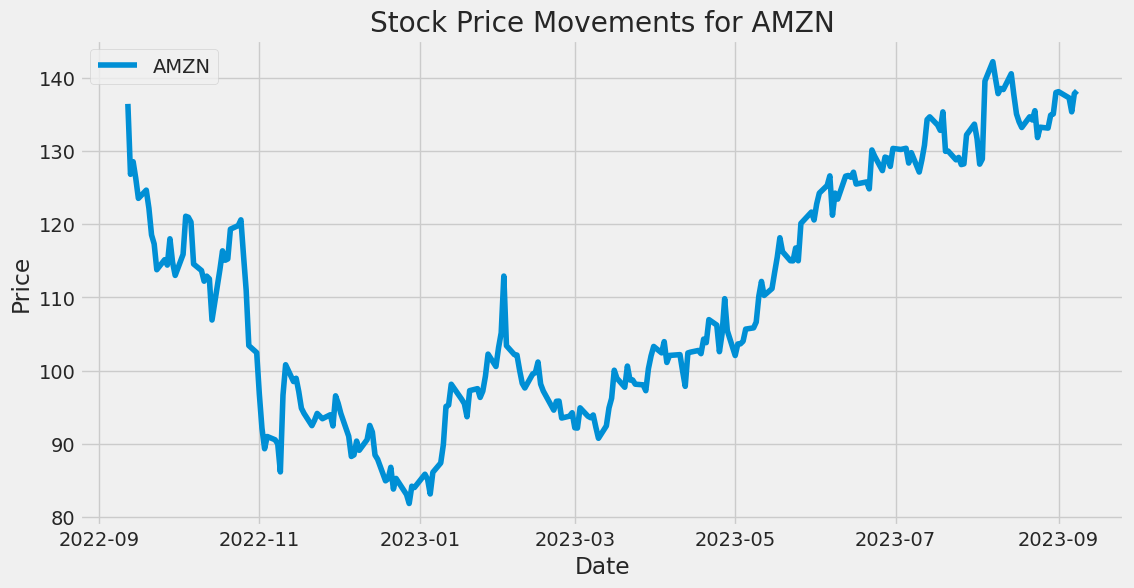

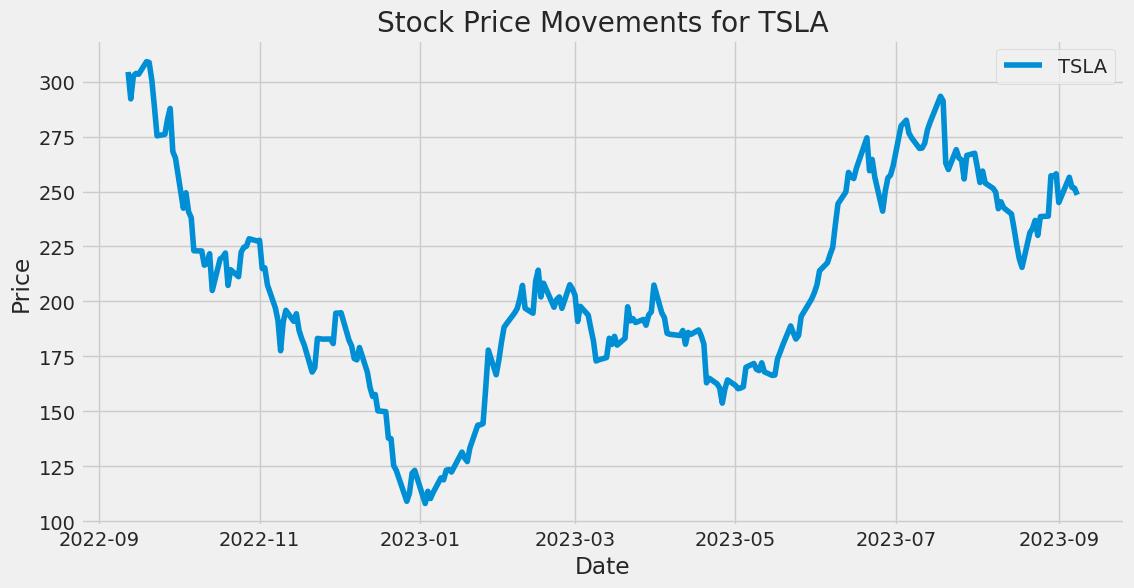

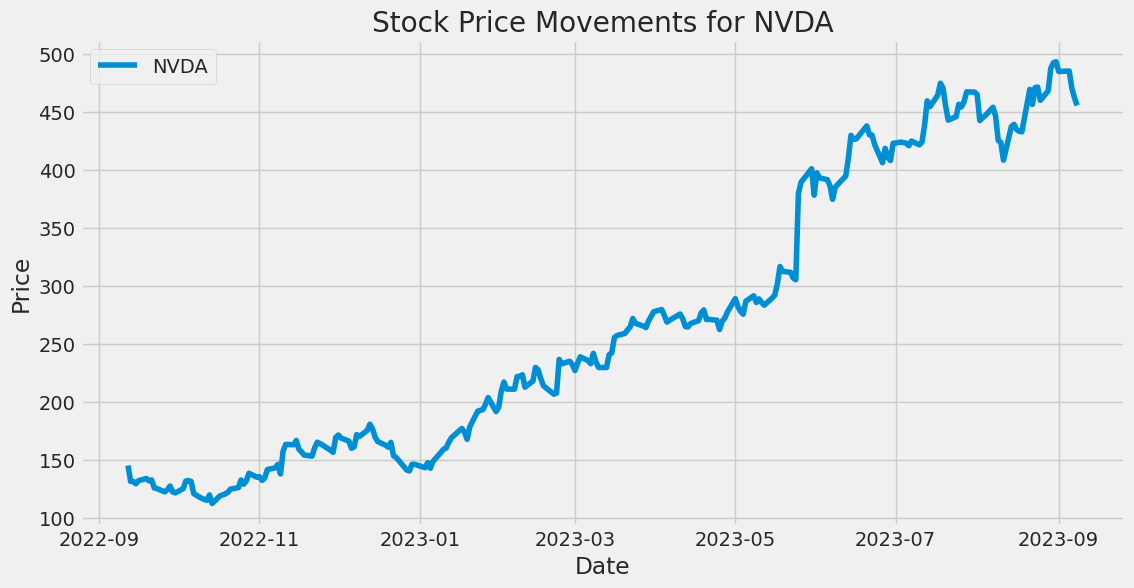

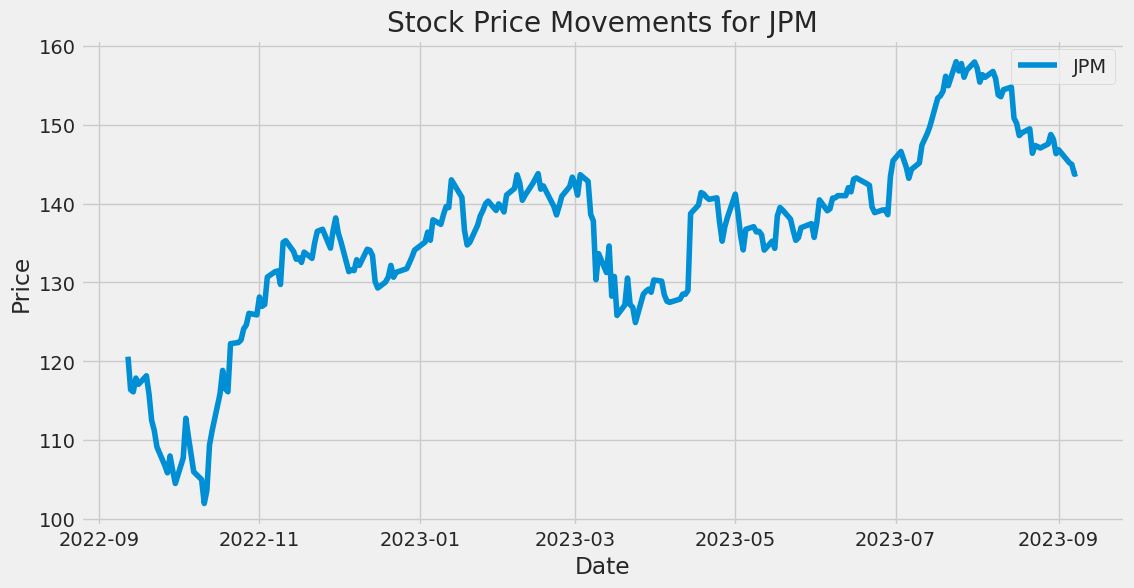

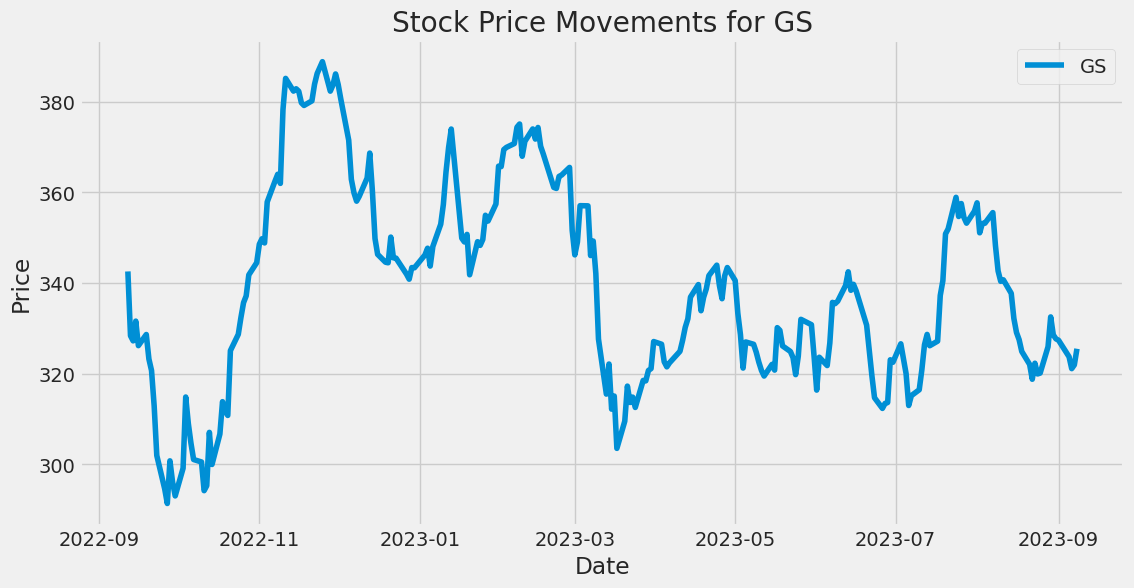

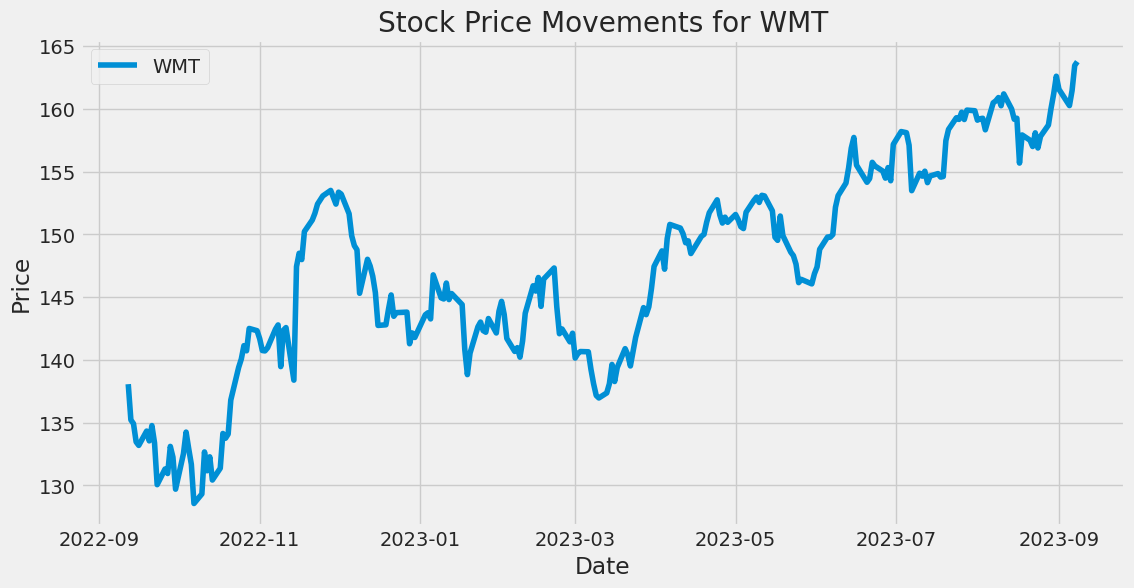

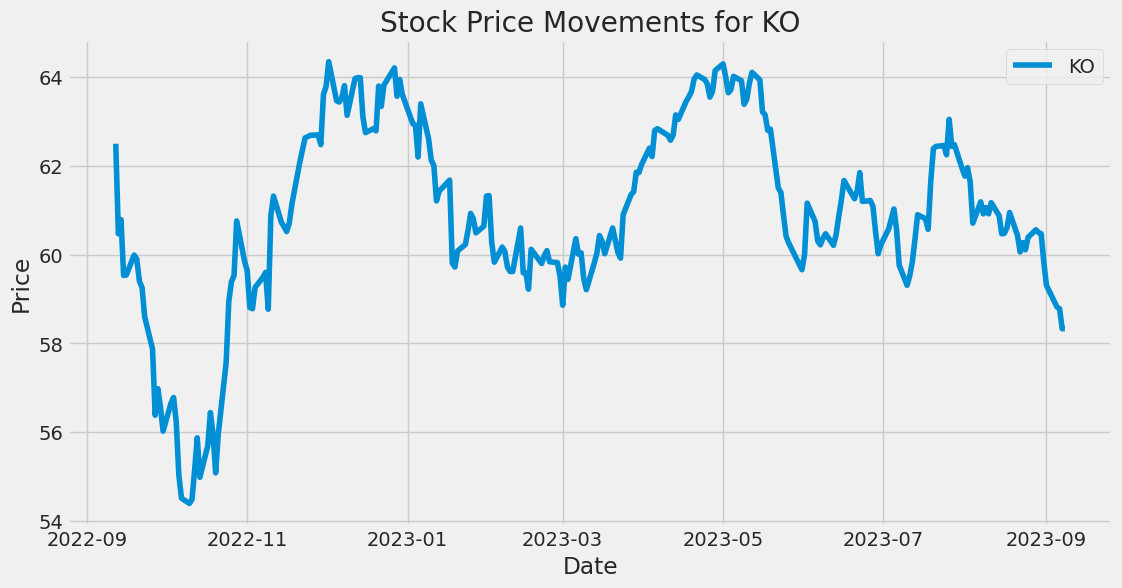

In [63]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label=symbol)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Stock Price Movements for {symbol}')
    plt.grid(True)
    plt.show()

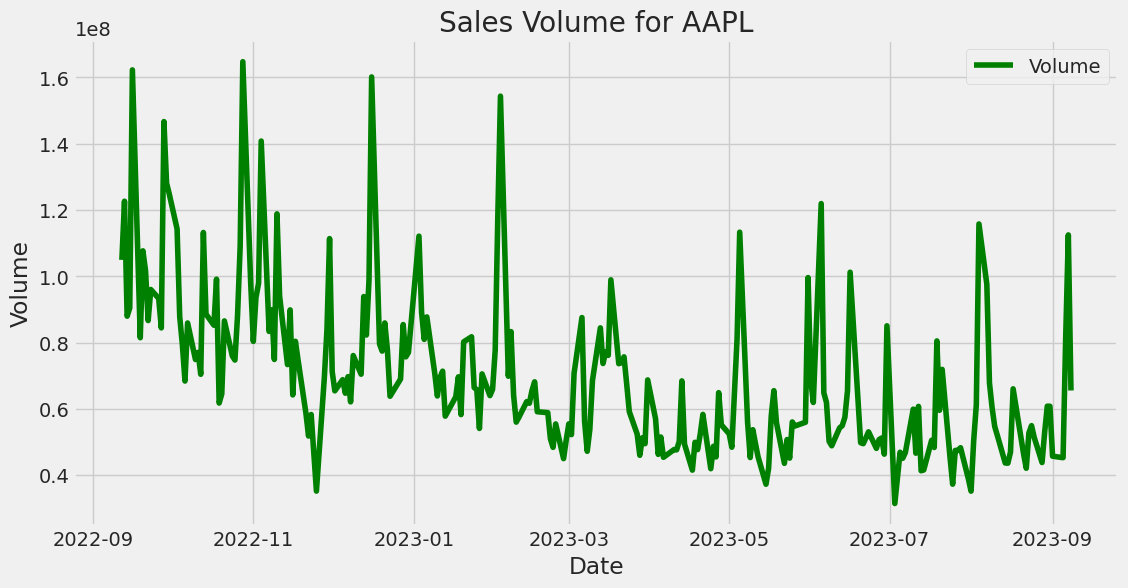

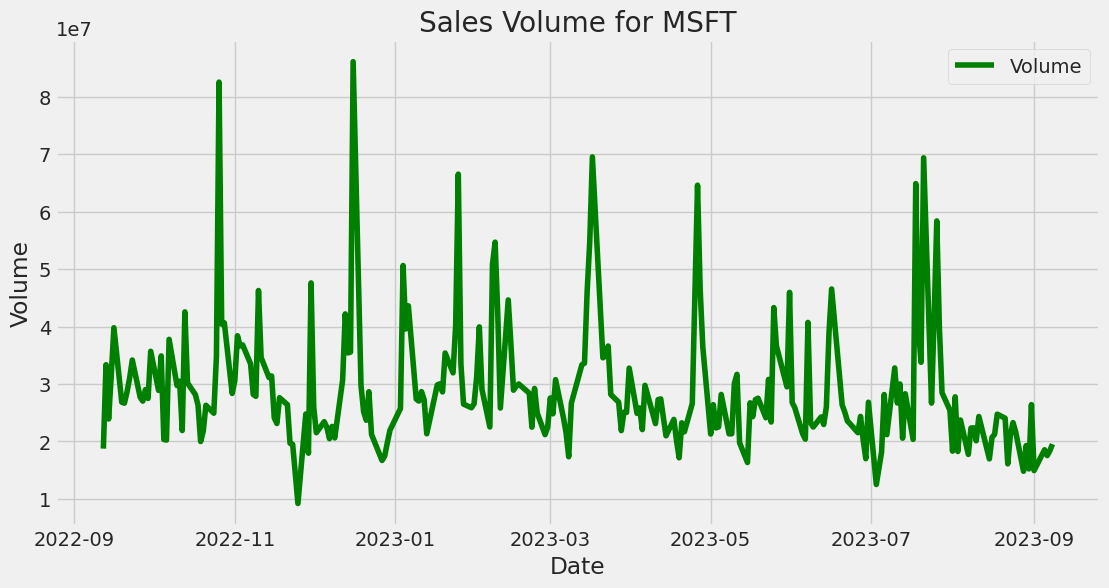

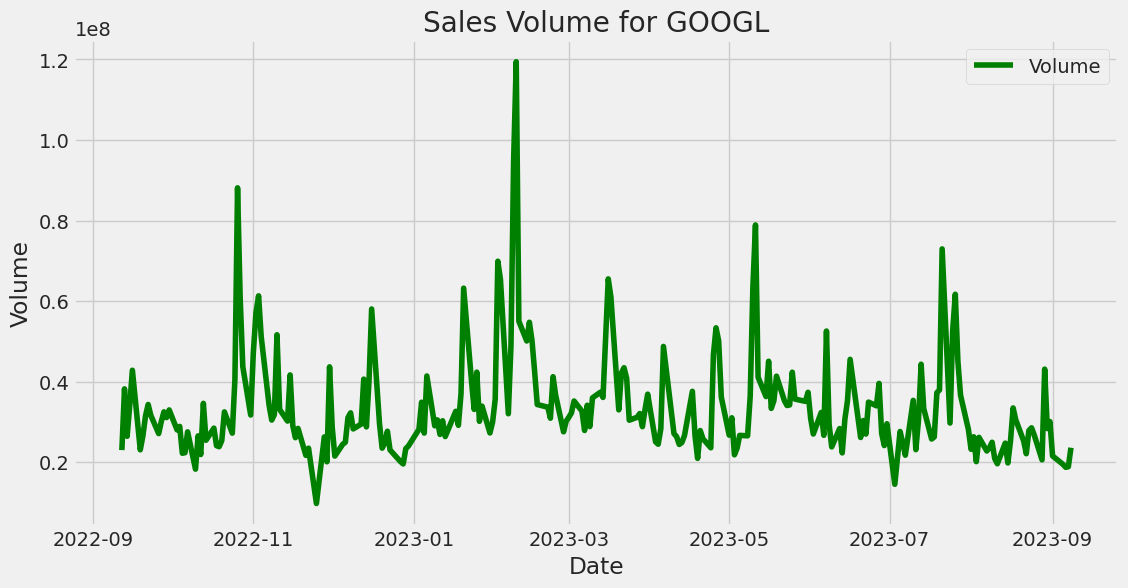

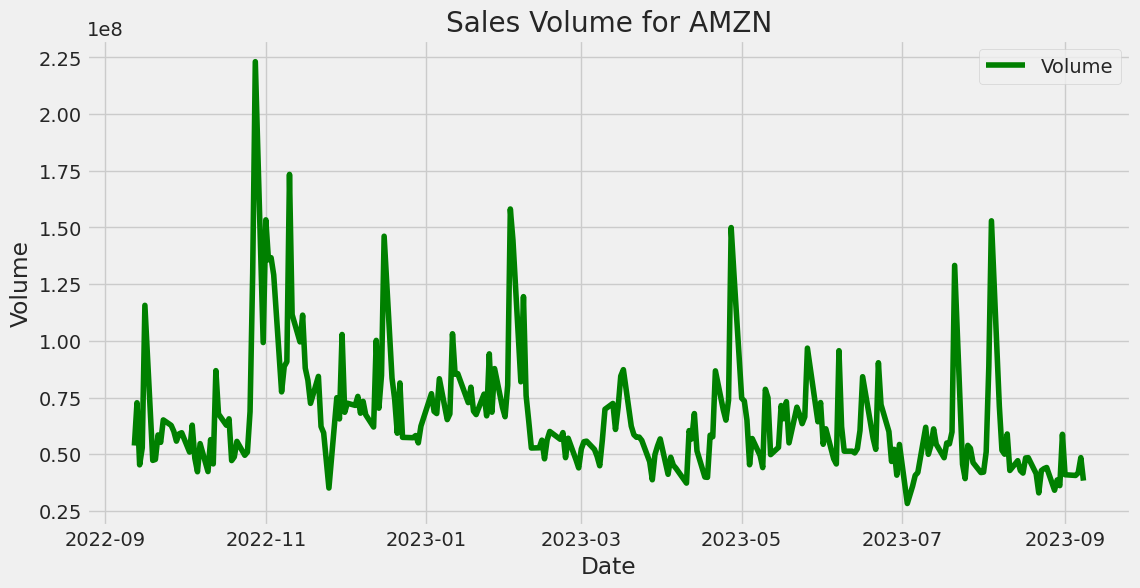

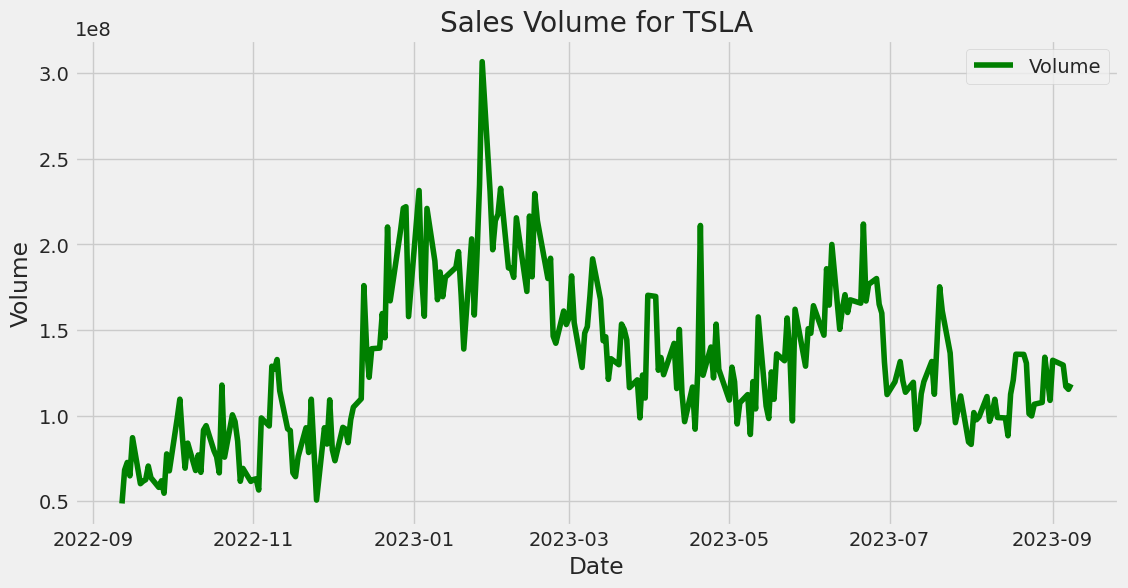

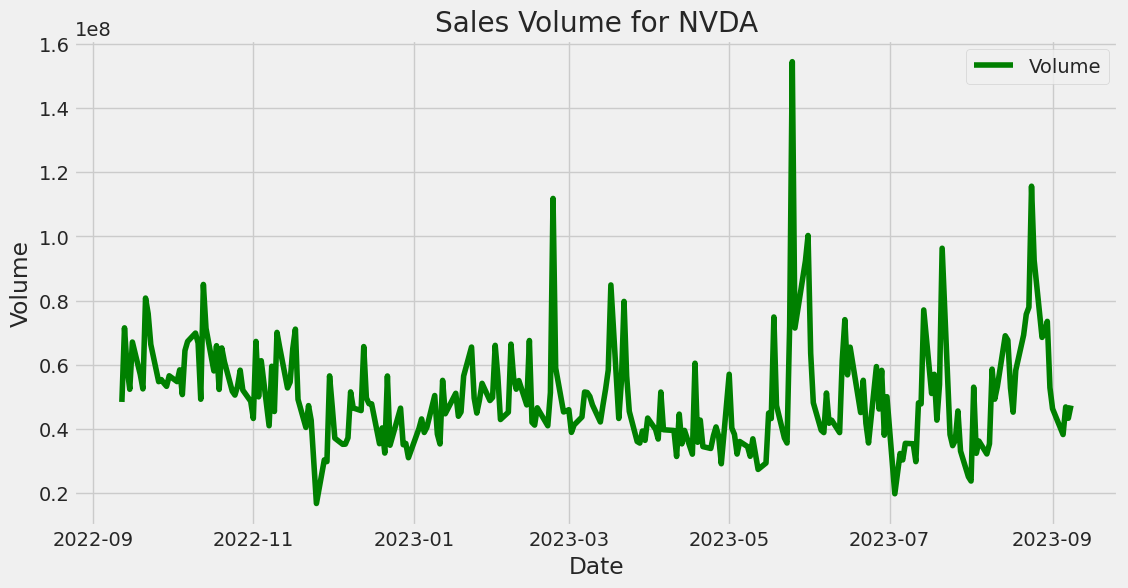

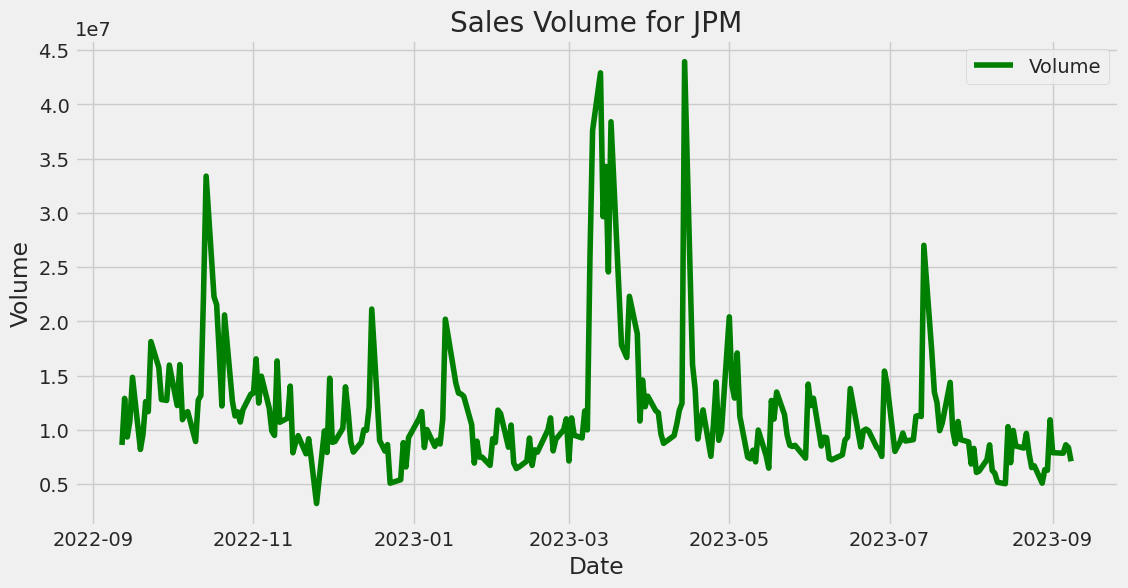

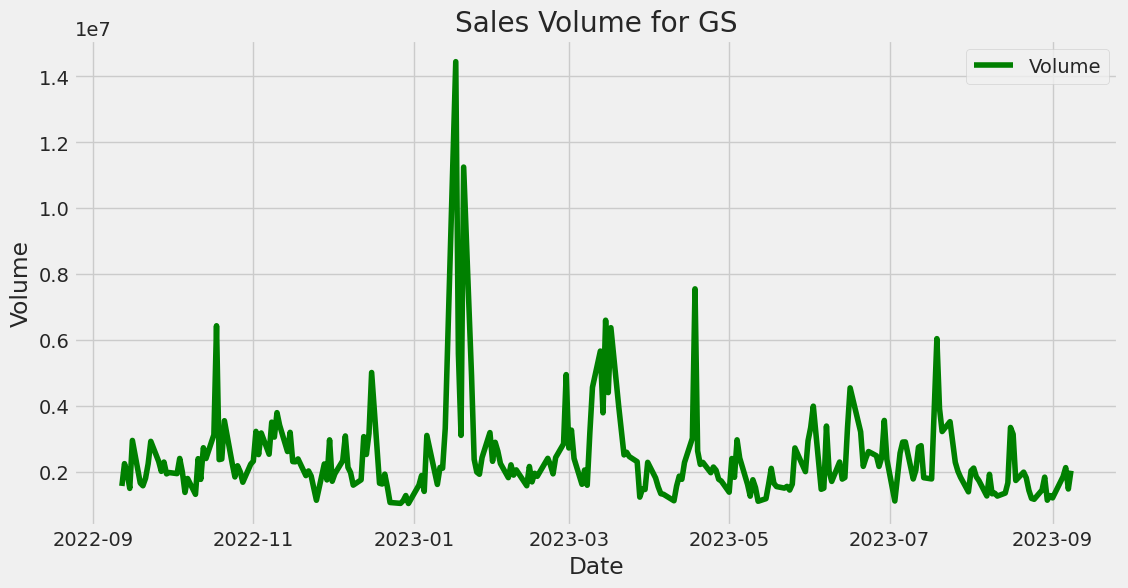

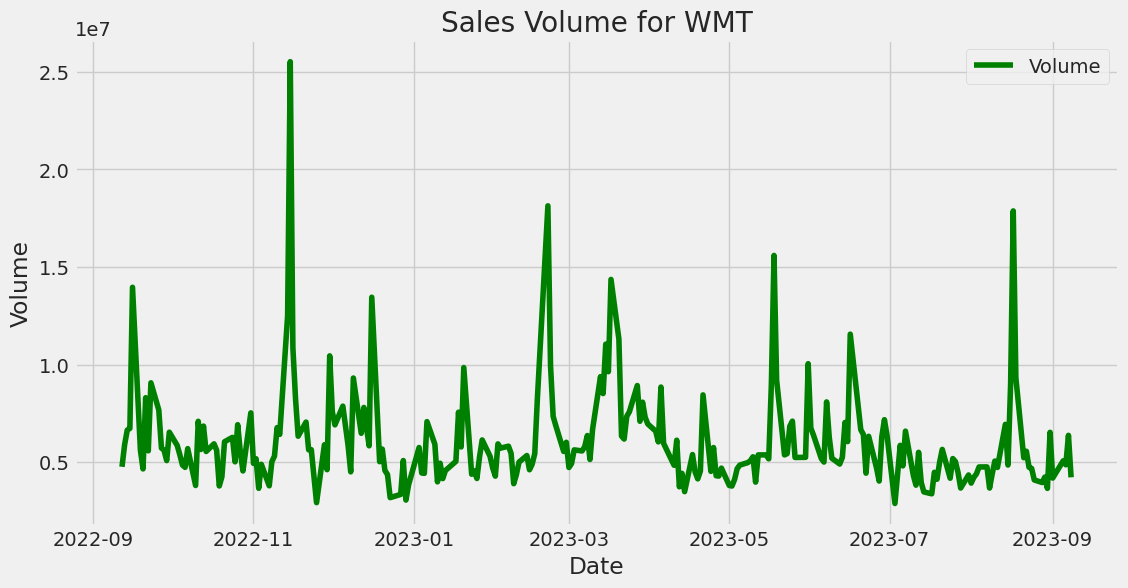

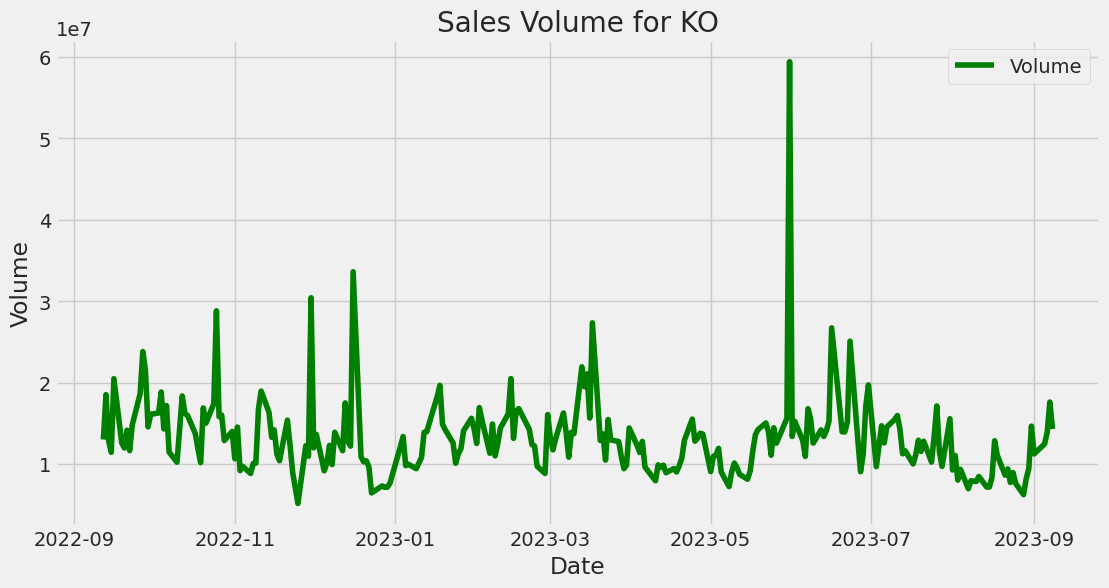

In [64]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volume'], label='Volume', color='green')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.title(f'Sales Volume for {symbol}')
    plt.grid(True)
    plt.show()

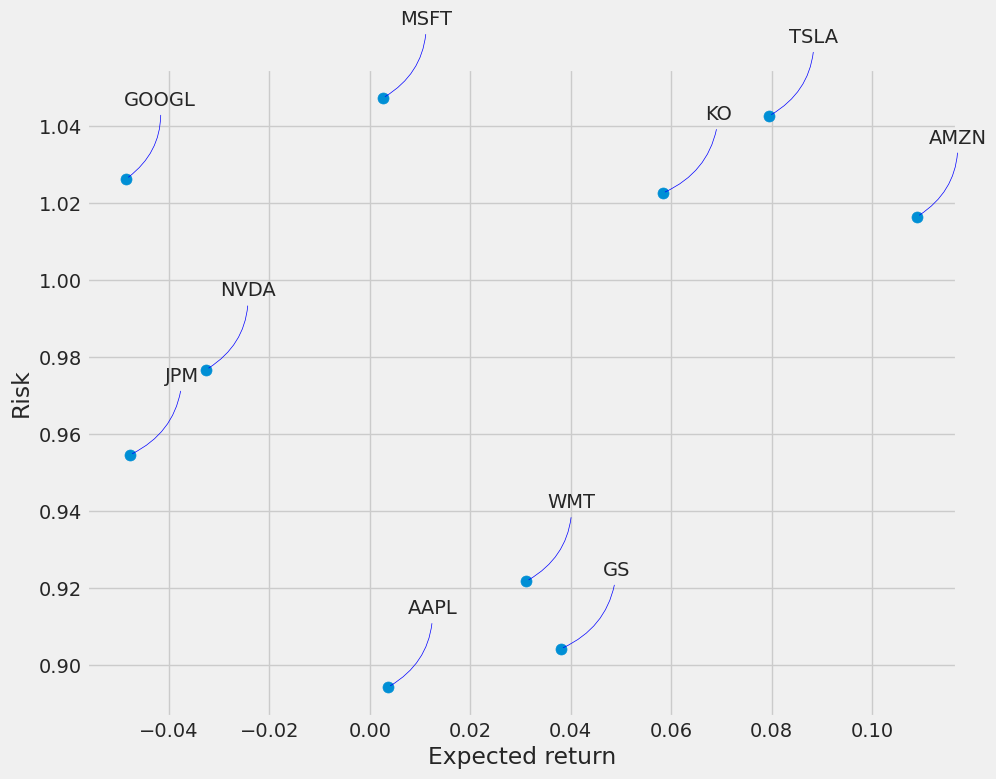

In [61]:
# Generate random data as a placeholder for tech_rets
np.random.seed(42)
data = np.random.randn(100, 10)
tech_rets = pd.DataFrame(data, columns=['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'JPM', 'GS', 'WMT', 'KO'])

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


In [62]:
for symbol, model in company_models.items():
    latest_closing_price = company_data[symbol]['Close'].iloc[-1]
    latest_data = pd.DataFrame({'Close': [latest_closing_price]})
    predicted_price = model.predict(latest_data)
    print(f"Predicted Price for {symbol} on the next day: {predicted_price[0]}")

Predicted Price for AAPL on the next day: 178.00163750083308
Predicted Price for MSFT on the next day: 334.4071497696081
Predicted Price for GOOGL on the next day: 136.5723992313125
Predicted Price for AMZN on the next day: 137.91929796169455
Predicted Price for TSLA on the next day: 247.10631809975445
Predicted Price for NVDA on the next day: 458.05956718585054
Predicted Price for JPM on the next day: 143.684039368745
Predicted Price for GS on the next day: 325.8316408150641
Predicted Price for WMT on the next day: 163.72858036815353
Predicted Price for KO on the next day: 58.40582108441478
